In [ ]:
!pip install earthengine-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import modul
import io
import ee,geemap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Initialisasi Earth Engine
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=lJpb7nKKIGioeaAorFEpikl8Mev7ESBYPNe-yu134hs&tc=aAPvU1snAz7cbVUX-5AhmetuVDU9ywEmEmGvbJekrwo&cc=qFaQAwUjkZRayp837H-cjoeiRd0ncDx6C6As3IB7YSE

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 65


KeyError: ignored

In [ ]:
aoi = ee.Geometry.Rectangle([95.89, 0.669, 95.89+(500/111), 0.669+(500/111)], proj='EPSG:4326') #AOI 500 km
aoi

In [ ]:
#Visualisasi SO2
so2 = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_SO2")\
       .select('SO2_column_number_density')\
       .filterDate('2019-05-01', '2019-06-01')

#Parameter Bands
band_viz = {
'min': 0.0,
'max': 0.0005,
'opacity': 0.5,
'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

#Ploting Map
Map = geemap.Map()
Map.addLayer(so2, band_viz, 'S5P SO2')

#Posisi Tampilan Map
Map.setCenter(95, 3, zoom=3)
Map

In [ ]:
#Informasi dari Image Collection
print(so2.get('SO2_column_number_density'))

ee.ComputedObject({
  "functionInvocationValue": {
    "functionName": "Element.get",
    "arguments": {
      "object": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.map",
                "arguments": {
                  "baseAlgorithm": {
                    "functionDefinitionValue": {
                      "argumentNames": [
                        "_MAPPING_VAR_0_0"
                      ],
                      "body": {
                        "functionInvocationValue": {
                          "functionName": "Image.select",
                          "arguments": {
                            "bandSelectors": {
                              "constantValue": [
                                "SO2_column_number_density"
                              ]
                            },
                  

In [ ]:
#Definisikan Algoritma Dataset
def reduce_s(img):
  stat = img.reduceRegion(reducer=ee.Reducer.sum(),  #ambil total value
                          geometry = aoi,            #area of interest
                          scale=1000).get('SO2_column_number_density')
  date = img.date().format()
  mydict = {'date': date, 'stat': stat}
  return ee.Feature(None).set(mydict)

In [ ]:
reduced_so2 = ee.FeatureCollection(so2.map(reduce_s))
#.filter(ee.Filter.notNull(['date','stat']))

In [ ]:
#Feature SO2
reduced_so2.getInfo()

{'columns': {'date': 'String', 'stat': 'Object'},
 'features': [{'geometry': None,
   'id': '20210701T000826_20210703T023901',
   'properties': {'date': '2021-07-01T00:29:59', 'stat': 0},
   'type': 'Feature'},
  {'geometry': None,
   'id': '20210701T014955_20210703T033140',
   'properties': {'date': '2021-07-01T02:11:30', 'stat': 0},
   'type': 'Feature'},
  {'geometry': None,
   'id': '20210701T033125_20210703T053800',
   'properties': {'date': '2021-07-01T03:53:00', 'stat': 0},
   'type': 'Feature'},
  {'geometry': None,
   'id': '20210701T051255_20210703T085748',
   'properties': {'date': '2021-07-01T05:34:30', 'stat': 1.2194457725850534},
   'type': 'Feature'},
  {'geometry': None,
   'id': '20210701T065425_20210703T083226',
   'properties': {'date': '2021-07-01T07:16:00', 'stat': 7.444029177985519},
   'type': 'Feature'},
  {'geometry': None,
   'id': '20210701T083555_20210703T103916',
   'properties': {'date': '2021-07-01T08:57:29', 'stat': 0},
   'type': 'Feature'},
  {'geometr

In [ ]:
#Export csv to Gdrive
task = ee.batch.Export.table.toDrive(
 collection = reduced_so2,
 description = 'so2_Mei2019',
 folder = 'sentinel',
 fileFormat = 'CSV',
 selectors = ['date','stat']
)

#Mulai Export
task.start()

In [ ]:
#Cek status export ke Gdrive
task.status()

{'attempt': 1,
 'creation_timestamp_ms': 1631078024395,
 'description': 'so2_Juli2021',
 'destination_uris': ['https://drive.google.com/#folders/14EZq8XEHmo4MtQ8bpc9kJ_14pZZg5mMu'],
 'id': 'UDOXGC5CHRKZJAEULNBQMPSQ',
 'name': 'projects/earthengine-legacy/operations/UDOXGC5CHRKZJAEULNBQMPSQ',
 'start_timestamp_ms': 1631078038826,
 'state': 'COMPLETED',
 'task_type': 'EXPORT_FEATURES',
 'update_timestamp_ms': 1631078049012}

In [ ]:
#Upload file
from google.colab import files
uploaded = files.upload()

Saving so2_Juli2021.csv to so2_Juli2021.csv


In [ ]:
#Read CSV
df = pd.read_csv(io.BytesIO(uploaded['so2_Juli2021.csv']))
df['date'] = pd.to_datetime(df['date'])
df

,date,stat
0,2021-07-01 00:29:59,0.000000
1,2021-07-01 02:11:30,0.000000
2,2021-07-01 03:53:00,0.000000
3,2021-07-01 05:34:30,1.219446
4,2021-07-01 07:16:00,7.444029
...,...,...
393,2021-07-31 16:20:15,0.000000
394,2021-07-31 18:01:44,0.000000
395,2021-07-31 19:43:14,0.000000
396,2021-07-31 21:24:44,0.000000


In [ ]:
df['date'] = df['date'].apply(lambda x : x.day)
df

,date,stat
0,1,0.000000
1,1,0.000000
2,1,0.000000
3,1,1.219446
4,1,7.444029
...,...,...
393,31,0.000000
394,31,0.000000
395,31,0.000000
396,31,0.000000


In [ ]:
df.loc[(df['stat'] < 0)] = 0
df

,date,stat
0,1,0.000000
1,1,0.000000
2,1,0.000000
3,1,1.219446
4,1,7.444029
...,...,...
393,31,0.000000
394,31,0.000000
395,31,0.000000
396,31,0.000000


In [ ]:
df = df.groupby(['date', 'stat']).sum()
print(df.index)

MultiIndex([( 0,                  0.0),
            ( 1,                  0.0),
            ( 1,   1.2194457725850534),
            ( 1,    7.444029177985518),
            ( 2,                  0.0),
            ( 2,    7.623469856756112),
            ( 3,                  0.0),
            ( 3,    4.202829606242596),
            ( 4,                  0.0),
            ( 5,                  0.0),
            ( 5,   0.5241683705713539),
            ( 6,                  0.0),
            ( 6,   0.3362880005615669),
            ( 7,                  0.0),
            ( 7,    4.280744001607019),
            ( 8,                  0.0),
            ( 9,                  0.0),
            ( 9,   0.6187841941821567),
            (10,                  0.0),
            (10,   0.2348454106115479),
            (11,                  0.0),
            (12,                  0.0),
            (13,                  0.0),
            (14,                  0.0),
            (17,                  0.0),


In [ ]:
tgldata = []
for isi in df.index:
  tgldata.append(isi)

In [ ]:
tgldata

[(0, 0.0),
 (1, 0.0),
 (1, 1.2194457725850534),
 (1, 7.444029177985518),
 (2, 0.0),
 (2, 7.623469856756112),
 (3, 0.0),
 (3, 4.202829606242596),
 (4, 0.0),
 (5, 0.0),
 (5, 0.5241683705713539),
 (6, 0.0),
 (6, 0.3362880005615669),
 (7, 0.0),
 (7, 4.280744001607019),
 (8, 0.0),
 (9, 0.0),
 (9, 0.6187841941821567),
 (10, 0.0),
 (10, 0.2348454106115479),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (17, 0.0),
 (17, 11.881023916580453),
 (18, 0.0),
 (18, 10.248109559096227),
 (19, 0.0),
 (19, 0.15740328010009316),
 (20, 0.0),
 (20, 10.756741012437756),
 (21, 0.0),
 (21, 9.8434389671576),
 (22, 0.0),
 (22, 0.3292217005971194),
 (22, 4.393905130800815),
 (23, 0.0),
 (23, 1.5544265333626943),
 (24, 0.0),
 (24, 0.17319127152470795),
 (25, 0.0),
 (25, 2.8677056079169447),
 (26, 0.0),
 (26, 1.3330056913298491),
 (27, 0.0),
 (27, 0.002344729519108316),
 (27, 4.1575227432528),
 (28, 0.0),
 (28, 6.326068322337935),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (31, 2.2594112311087864)]

In [ ]:
tgl = [] ; data = []
for i in range(1, 32):
  sum = 0 ; j = 0
  while j < len(tgldata):
    if i == tgldata[j][0]:
      sum += tgldata[j][1]
      tgldata[j] == ()
    j += 1
  tgl.append(i) ; data.append(sum)

In [ ]:
new = {}
for q in range(len(tgl)):
  new[tgl[q]] = data[q]
print(new)

{1: 8.663474950570572, 2: 7.623469856756112, 3: 4.202829606242596, 4: 0.0, 5: 0.5241683705713539, 6: 0.3362880005615669, 7: 4.280744001607019, 8: 0.0, 9: 0.6187841941821567, 10: 0.2348454106115479, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0, 16: 0, 17: 11.881023916580453, 18: 10.248109559096227, 19: 0.15740328010009316, 20: 10.756741012437756, 21: 9.8434389671576, 22: 4.723126831397934, 23: 1.5544265333626943, 24: 0.17319127152470795, 25: 2.8677056079169447, 26: 1.3330056913298491, 27: 4.159867472771908, 28: 6.326068322337935, 29: 0.0, 30: 0.0, 31: 2.2594112311087864}


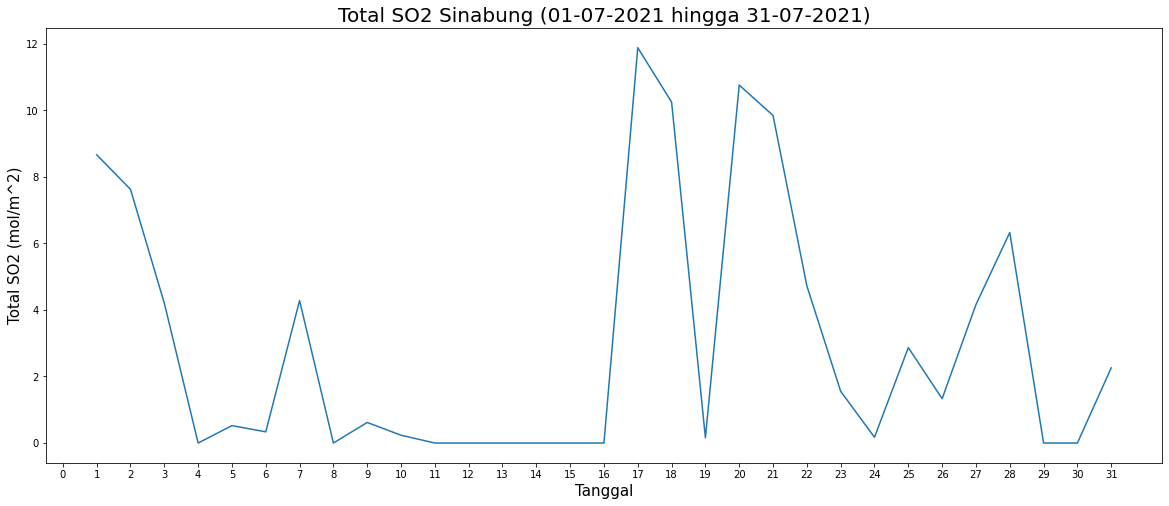

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(tgl, data)
plt.xticks(np.arange(0,32,1))
plt.xlabel('Tanggal',fontsize=15)
plt.ylabel('Total SO2 (mol/m^2)',fontsize=15)
plt.title('Total SO2 Sinabung (01-07-2021 hingga 31-07-2021)',fontsize=20)
plt.show()

In [ ]:
plt.savefig('grafik.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
#Konversi ke DU
df['stat'] = df['stat']*2241.15
df

,stat
date,
2019-06-01 01:40:04,NaN
2019-06-01 03:21:34,NaN
2019-06-01 05:03:03,NaN
2019-06-01 06:44:33,0.61522
2019-06-01 08:26:04,NaN
...,...
2019-06-29 16:28:08,NaN
2019-06-29 18:09:38,NaN
2019-06-29 19:51:07,NaN


In [ ]:
df.fillna(0)

,stat
date,
2019-06-01 01:40:04,0.00000
2019-06-01 03:21:34,0.00000
2019-06-01 05:03:03,0.00000
2019-06-01 06:44:33,0.61522
2019-06-01 08:26:04,0.00000
...,...
2019-06-29 16:28:08,0.00000
2019-06-29 18:09:38,0.00000
2019-06-29 19:51:07,0.00000


In [ ]:
#Filterisasi
df.loc[(df['stat'] < 0.75)] = 0
df['stat'] = df['stat']*0.7
df

,stat
date,
2019-06-01 01:40:04,0.0
2019-06-01 03:21:34,0.0
2019-06-01 05:03:03,0.0
2019-06-01 06:44:33,0.0
2019-06-01 08:26:04,0.0
...,...
2019-06-29 16:28:08,0.0
2019-06-29 18:09:38,0.0
2019-06-29 19:51:07,0.0


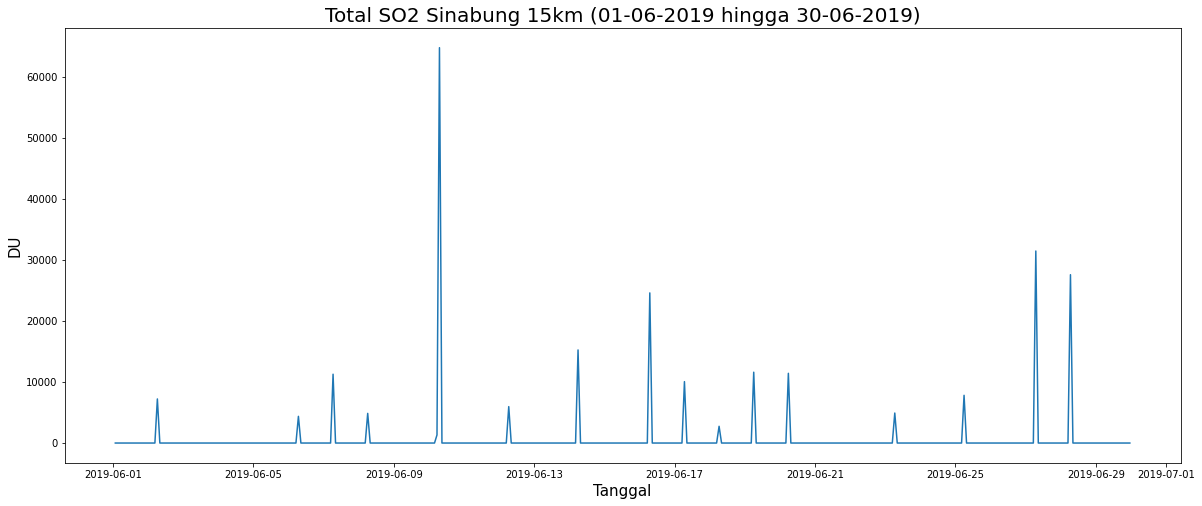

In [ ]:
#Visualisasi Time Series SO2
plt.figure(figsize=(20,8))
plt.plot(df.index, df['stat'])
plt.xlabel('Tanggal',fontsize=15)
plt.ylabel('DU',fontsize=15)
plt.title('Total SO2 Sinabung 15km (01-06-2019 hingga 30-06-2019)',fontsize=20)
plt.show()